# Data Exploration
Author: Audrey Yip

In [2]:
import os
import pandas as pd

In [6]:
# read in csvs to create combined df
cwd = os.getcwd()
metadata_dir = f'{cwd}/donated_data'
metadata_files = [file for file in os.listdir(metadata_dir) if 'csv' in file] 

dataframes = []

for file in metadata_files:
    print('Currently processing', file)
    file_path = os.path.join(metadata_dir, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

print('Total number of videos', len(combined_df))

Currently processing results_50405_full.csv
Currently processing Sec2Gr3_77777.csv
Currently processing Sec2Gr3_77217.csv
Currently processing Sec2Gr3_74721.csv
Currently processing results_38129.csv
Currently processing results_26301.csv
Currently processing results_33534.csv
Currently processing results_12345_full.csv
Currently processing section_02.csv
Currently processing results_10824_full.csv
Currently processing results_69117.csv
Total number of videos 169666


/var/folders/3x/2ycn49s93nq5cl2h1z2tvrh00000gn/T/ipykernel_66779/3724251558.py:11: DtypeWarning: Columns (8,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [55]:
# drop all duplicate videos
df.drop_duplicates('video_id')

# only keep relevant columns
df = df[['video_id', 'video_diggcount', 'video_sharecount', 'video_commentcount', 'video_playcount']]
df.head()

len(df)

15747

In [51]:
# drop rows where header didn't merge properly
df = df.drop(7663)
df = df.drop(15731)
df = df.reset_index(drop=True)

cols_to_convert = ['video_sharecount', 'video_commentcount', 'video_diggcount', 'video_playcount']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)


# summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)


print('Video share count (95th percentile): ', df['video_sharecount'].quantile(.95))
print('Video play count (95th percentile): ', df['video_playcount'].quantile(.95))

print('Video share count (90th percentile): ', df['video_sharecount'].quantile(.9))
print('Video play count (90th percentile): ', df['video_playcount'].quantile(.9))


Summary Statistics:
       video_diggcount  video_sharecount  video_commentcount  video_playcount
count     1.571900e+04      15719.000000        15719.000000     1.571900e+04
mean      3.655640e+05       5673.800687         2515.514727     6.527607e+06
std       9.046140e+05      25225.567870        10154.046205     2.412024e+07
min       0.000000e+00          0.000000            0.000000     0.000000e+00
25%       9.785000e+03         62.000000           72.000000     3.132500e+05
50%       8.010000e+04        495.000000          497.000000     1.400000e+06
75%       3.396000e+05       2934.000000         1906.500000     4.900000e+06
max       2.500000e+07     847100.000000       597900.000000     7.602000e+08
Video share count (95th percentile):  23109.999999999854
Video play count (95th percentile):  25200000.0
Video share count (90th percentile):  11200.0
Video play count (90th percentile):  14100000.0


In [52]:
df_filtered = df[df['video_sharecount'] > 11200.0] 
df_filtered = df_filtered[df_filtered['video_playcount'] > 14100000.0] 


len(df_filtered)


495

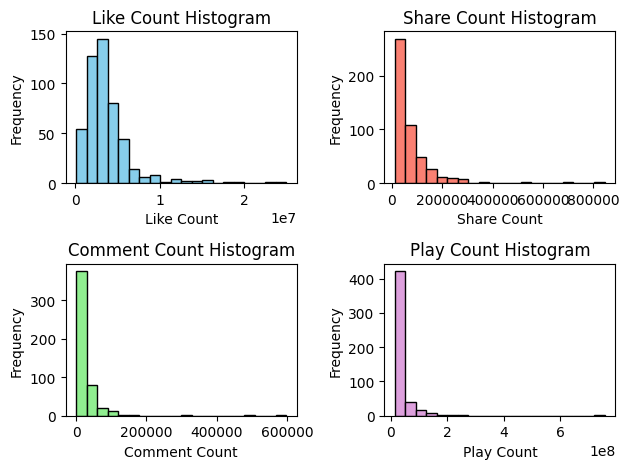

In [54]:
# plot histograms

import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.hist(df_filtered['video_diggcount'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Like Count Histogram')
plt.xlabel('Like Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_filtered['video_sharecount'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Share Count Histogram')
plt.xlabel('Share Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df_filtered['video_commentcount'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Comment Count Histogram')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df_filtered['video_playcount'].dropna(), bins=20, color='plum', edgecolor='black')
plt.title('Play Count Histogram')
plt.xlabel('Play Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()